# Pymaceuticals Inc.
---

### Analysis

The Pymaceuticals Challenge analysed the efficacy of 10 different Drug Regimens on tumors in each of 248 mice.  

Attention was paid to analysis of the weight (g) and Tumor Volumes (mm3) at various timepoints (days) when the tumors in the mice were measured. 51% of the mice receiving treatment were male, and 49% were female. 

Effective treatment is measured by: <br>
(1) the ability of a drug to keep the tumor volumes smaller, and even reduce the tumor volume over time, and <br>
(2) achieving a higher number of timepoints, indicating the mice responded better to the drug and were able to receive more treatment doses with more timepoint measurements taken.

The Ramicane proved to be the most successful in achieving the lowest final tumor volumes, as shown by the boxplot at step 23 below. Ramicane's smallest final tumor volume was 22.05 mm3, and it's largest 45.22 mm3, with it's median final tumor volume being 36.56. Ramicane also achieved the second highest number of observable timepoints, being 228, only two less than the Capomulin observable timepoints. Therefore Ramicane, together with Capomulin effectively treated the tumors, keep tumor sizes lower for longer, allowing more observations to be taken from the mice. 

Capomulin was also relatively successful in achieving lower final tumor volumes, with it's median final tumor volume being only 38.12 mm2, achieved with 230 observable timepoints. Capomulin's lowest tumor volume was 23.34 mm3 and it's highest 47.69. Results  The data for mouse I509 on the Capomulin Drug Regimen showed that by day 20 of the treatments, Capomulin started to significantly reduce the tumor volume, until about day 25 when it increased slightly again. From Day 30, presumably due to receiving another dose of Capomulin, the tumor again reduced significantly, until day 40, but then it proceeded to increase in volume again, and at a slightly quicker rate after day 45.  

Of the 4 Drug Regimens studied more closely, (Ramicane, Capomulin, Infubinol and Ceftamin), only Infubinol had an outlier, with one timepoint returning a very low result of 36.32 mm2 for the final tumor volume for one mouse.  Both Infubinol and Ceftamin had larger mean standard deviations of 6.56 and 6.26 respectively for their observed tumor volumes, demonstrating a wider range of tumor volume variances for these two drug regiments.   Ramicane and Capomulin, by comparison, had lower standard deviations, of 4.85 and 4.99 respectively, and lower variances in their recorded tumor volume variances.  So overall Ramicane and Capomulin kept the tumors smaller and in a tighter range of volume, than the other drugs. 

Finally, the study of the average tumor volume (mm3) versus the weight of each mouse on Capomulin, showed a positive correlation between the average tumor volume (mm3) and the weight of the mouse. The higher the tumor volume (mm3), the greater the weight of the mouse. 

 ##### Reference: https://stackoverflow.com/questions/41906199/how-to-make-a-new-line-in-a-jupyter-markdown-cell#:~:text=Just%20add%20where%20you,to%20make%20the%20new%20line.&text=Because%20jupyter%20notebook%20markdown%20cell%20is%20a%20superset%20of%20HTML.&text=Note%20that%20newlines%20using%20%3Cbr,%3E%20PDF%20via%20LaTeX%22).

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data_combined_df = pd.merge(study_results, mouse_metadata, how = "left", on= ["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_data_combined_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [2]:
# Checking the number of mice.
# Reference:https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/
unique_mouse_id_int = len(pd.unique(mouse_study_data_combined_df['Mouse ID']))

print (unique_mouse_id_int)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

grouped_by_Mouse_ID_Timepoint = mouse_study_data_combined_df.groupby(["Mouse ID","Timepoint"]) #Creates a DataFrame Group By Object

duplicate_mouse_id_timepoint_df = pd.DataFrame(grouped_by_Mouse_ID_Timepoint[["Timepoint"]].count()) # Count occurrences of Timepoint by Mouse ID

duplicate_mouse_id_timepoint_df.loc[duplicate_mouse_id_timepoint_df['Timepoint'] >1] # Find Mouse ID with duplicate Timepoint records

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Reference:https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
mouse_with_duplicate_records_df = mouse_study_data_combined_df.loc[mouse_study_data_combined_df['Mouse ID'] == 'g989']
mouse_with_duplicate_records_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Reference:https://saturncloud.io/blog/how-to-delete-dataframe-rows-in-pandas-based-on-column-value/#:~:text=To%20delete%20rows%20from%20a%20DataFrame%20based%20on%20a%20specific,of%20row%20labels%20to%20delete.

clean_df = mouse_study_data_combined_df.drop(mouse_study_data_combined_df[mouse_study_data_combined_df['Mouse ID'] == 'g989'].index)
clean_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1       Male          15          29  
2     Female           2          29  
3     Female          11          30  
4       Male          21          25  
...      ...         ...         ...  
1888    Male          12          25  
1889    Male          18          17  
1890  Female          11          26  
1891  Female          21          30  
1892  Female           4          26  

[1880 rows x 8 columns]

In [6]:
# Checking the number of mice in the clean DataFrame.
unique_clean_int = len(pd.unique(clean_df['Mouse ID']))

print (unique_clean_int)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_groupby_obj = clean_df.groupby(["Drug Regimen"])

#Reference: https://docs.scipy.org/doc/scipy/reference/stats.html
mean_tumor_volume_series = drug_regimen_groupby_obj["Tumor Volume (mm3)"].mean() 
median_tumor_volume_series = drug_regimen_groupby_obj["Tumor Volume (mm3)"].median()
tumor_volume_variance_series = drug_regimen_groupby_obj["Tumor Volume (mm3)"].var()
tumor_volume_std_dev_series = drug_regimen_groupby_obj["Tumor Volume (mm3)"].std()
tumor_volume_std_err_series = drug_regimen_groupby_obj["Tumor Volume (mm3)"].sem()

summary_statistics_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume_series,
    "Median Tumor Volume": median_tumor_volume_series,
    "Tumor Volume Variance": tumor_volume_variance_series,
    "Tumor Volume Std.Dev.": tumor_volume_std_dev_series,
    "Tumor Volume Std.Err.": tumor_volume_std_err_series,
})

summary_statistics_df

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std.Dev.  Tumor Volume Std.Err.  
Drug Regimen                                                
Capomulin                  4.994774               0.329346  
Ceftamin                   6.268188               0.469821  
Infubinol                  6.567243               0.492236  
Ketapril                   8.279709               0.603860  
Naftisol                   8.134708               0.596466  
Placebo                    7.821003               0.581331  
Propriva                   6.622085               0.544332  
Ramicane                   4.846308               0.320955  
Stelasyn                   7.710419               0.573111  
Zoniferol                  6.966589               0.516398

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html
summary_statistics = pd.DataFrame(clean_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}))
summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

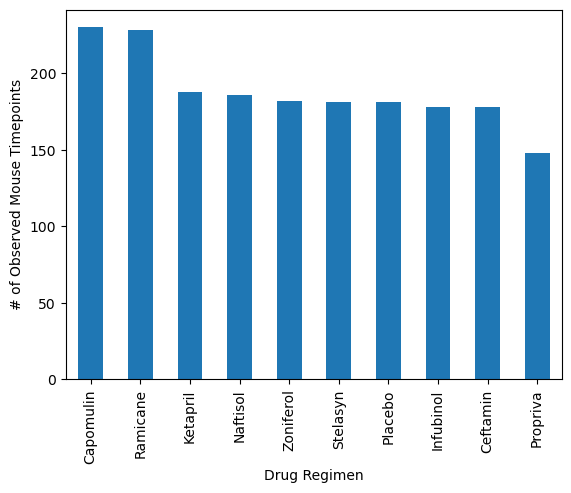

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Filter clean_df to get only the required fields
required_data_columns_df = clean_df[['Timepoint','Drug Regimen']]

# Count timepoints per Drug Regimen
drug_regimen_timepoints_series = required_data_columns_df['Drug Regimen'].value_counts()

figure1 = drug_regimen_timepoints_series.plot(kind = 'bar')
figure1.set_xlabel('Drug Regimen')
figure1.set_ylabel('# of Observed Mouse Timepoints')
plt.show()

In [22]:
drug_regimen_timepoints_series

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

In [10]:
clean_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

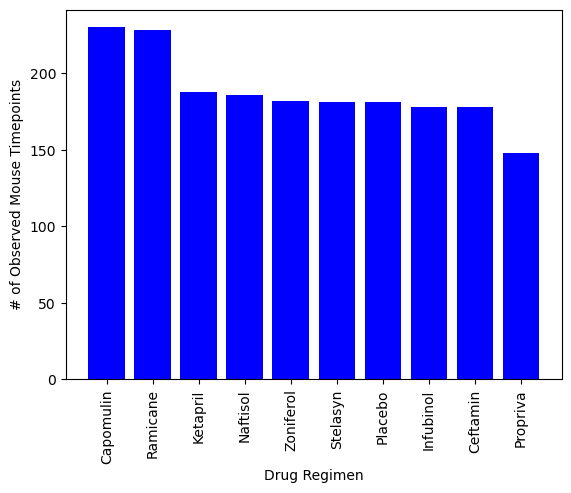

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Reference: https://stackoverflow.com/questions/57383635/how-to-rotate-x-axis-tick-labels-on-matplotlib-bar-chart-tried-several-approach

usage_of_drug_regimen_series = clean_df['Drug Regimen'].value_counts()
x_axis = usage_of_drug_regimen_series.index

plt.bar(x_axis, usage_of_drug_regimen_series, color = 'b', align = 'center')
xticklabels = x_axis
plt.xticks(xticklabels)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

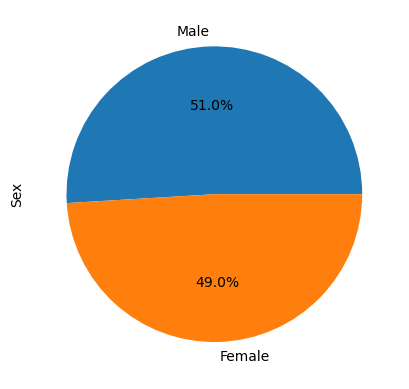

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Male and Female percentages
male_female_mice_df = clean_df['Sex'].value_counts()

figure1 = male_female_mice_df.plot(kind = 'pie', autopct = '%1.1f%%')
figure1.set_ylabel('Sex')
plt.show()

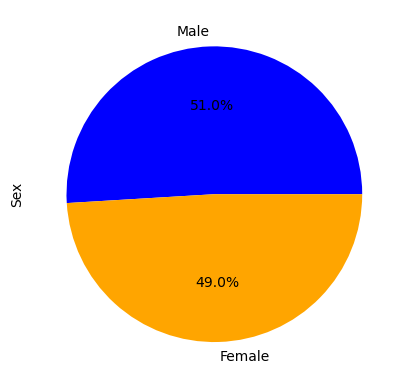

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_male_female = clean_df['Sex'].value_counts()
mice_male_female

labels = ['Male', 'Female']
size = (mice_male_female)
colors = ('blue', 'orange')

plt.pie(size, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get only the row of data required from the clean_df DataFrame
treatment_regimens_df = clean_df.loc[(clean_df["Drug Regimen"] == 'Capomulin') |
                        (clean_df["Drug Regimen"] == 'Ramicane') |
                        (clean_df["Drug Regimen"] == 'Infubinol') |
                        (clean_df["Drug Regimen"] == 'Ceftamin'),:]

# Start by getting the last (greatest) timepoint for each mouse
# Get only required columns of data
treatment_regimens_df = treatment_regimens_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]

# Group by Mouse ID
# Reference: https://stackoverflow.com/questions/47647464/groupby-in-pandas-python
treatment_regimens_groupby_obj = treatment_regimens_df.groupby('Mouse ID')

# Get last (greatest) Timepoint per mouse ID, while converting the groupby object to a series
max_mouse_timepoint_series = treatment_regimens_groupby_obj['Timepoint'].max()

# Convert the series to a DataFrame
max_mouse_timepoint_df = pd.DataFrame(max_mouse_timepoint_series)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatment_regimens_df = treatment_regimens_df.set_index('Mouse ID')

# Merge the DataFrames
# Reference: https://saturncloud.io/blog/how-to-merge-join-two-data-frames-on-multiple-columns-using-pandas/
treatment_regimens_df1 = pd.merge(max_mouse_timepoint_df, treatment_regimens_df, how = 'left', on= ["Mouse ID", "Timepoint"])



In [15]:
treatment_regimens_df1.head(100)

Timepoint  Tumor Volume (mm3) Drug Regimen
Mouse ID                                            
a203             45           67.973419    Infubinol
a251             45           65.525743    Infubinol
a275             45           62.999356     Ceftamin
a411             45           38.407618     Ramicane
a444             45           43.047543     Ramicane
...             ...                 ...          ...
y769             45           68.594745     Ceftamin
y793             45           31.896238    Capomulin
y865             45           64.729837     Ceftamin
z578             45           30.638696     Ramicane
z581             45           62.754451    Infubinol

[100 rows x 3 columns]

In [16]:
# Reference: https://ioflood.com/blog/dataframe-to-list-pandas/#:~:text=TL%3BDR%3A%20How%20do%20I,tolist()%20.
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
treatment_list_series = treatment_regimens_df1[['Drug Regimen', 'Tumor Volume (mm3)']]

# Create empty list to fill with tumor vol data (for plotting)

capomulin_tumor_volumes = []
ramicane_tumor_volumes = []
infubinol_tumor_volumes = []
ceftamin_tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

capomulin_treatment_list = treatment_regimens_df1.loc[treatment_regimens_df1['Drug Regimen'] == 'Capomulin']
capomulin_treatment = capomulin_treatment_list['Tumor Volume (mm3)']
capomulin_treatment_list = capomulin_treatment_list['Tumor Volume (mm3)'].tolist()
capomulin_treatment_list.sort()

ramicane_treatment_list = treatment_regimens_df1.loc[treatment_regimens_df1['Drug Regimen'] == 'Ramicane']
ramicane_treatment = ramicane_treatment_list['Tumor Volume (mm3)']
ramicane_treatment_list = ramicane_treatment_list['Tumor Volume (mm3)'].tolist()
ramicane_treatment_list.sort()

infubinol_treatment_list = treatment_regimens_df1.loc[treatment_regimens_df1['Drug Regimen'] == 'Infubinol']
infubinol_treatment = infubinol_treatment_list['Tumor Volume (mm3)']
infubinol_treatment_list = infubinol_treatment_list['Tumor Volume (mm3)'].tolist()
infubinol_treatment_list.sort()

ceftamin_treatment_list = treatment_regimens_df1.loc[treatment_regimens_df1['Drug Regimen'] == 'Ceftamin']
ceftamin_treatment = ceftamin_treatment_list['Tumor Volume (mm3)']
ceftamin_treatment_list = ceftamin_treatment_list['Tumor Volume (mm3)'].tolist()
ceftamin_treatment_list.sort()

    # add subset 
capomulin_quartiles = capomulin_treatment.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

ramicane_quartiles = ramicane_treatment.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

infubinol_quartiles = infubinol_treatment.quantile([.25, .5, .75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

ceftamin_quartiles = ceftamin_treatment.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq

    # Determine outliers using upper and lower bounds
capomulin_lower_bound = capomulin_lowerq - ( 1.5 * capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5 * capomulin_iqr)
ramicane_lower_bound = ramicane_lowerq - (1.5 * ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5 * ramicane_iqr)
infubinol_lower_bound = infubinol_lowerq - (1.5 * infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5 * infubinol_iqr)
ceftamin_lower_bound = ceftamin_lowerq - (1.5 * ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5 * ceftamin_iqr)

print(f"Capomulin's potential outliers are values below {capomulin_lower_bound} and values above {capomulin_upper_bound}.  No such outliers exist in the current data")
print(f"Ramicane's potential outliers are values below {ramicane_lower_bound} and values above {ramicane_upper_bound}.  No such outliers exist in the current data")
print(f"Infubinol's potential outliers are values below {infubinol_lower_bound} and values above {infubinol_upper_bound}. One outlier is show in the data and boxplot, equal to 36.321346")
print(f"Ceftamin's potential outliers are values below {ceftamin_lower_bound} and values above {ceftamin_upper_bound}.  No such outliers exist in the current data")

Capomulin's potential outliers are values below 20.70456164999999 and values above 51.83201549.  No such outliers exist in the current data
Ramicane's potential outliers are values below 17.912664470000003 and values above 54.30681135.  No such outliers exist in the current data
Infubinol's potential outliers are values below 36.83290494999999 and values above 82.74144559000001. One outlier is show in the data and boxplot, equal to 36.321346
Ceftamin's potential outliers are values below 25.355449580000002 and values above 87.66645829999999.  No such outliers exist in the current data


In [17]:
print(capomulin_treatment_list)
print(capomulin_lowerq)
print(capomulin_upperq)
print(capomulin_iqr)
print(capomulin_lower_bound)
print(capomulin_upper_bound)

[23.34359787, 28.43096411, 28.48403281, 30.48598484, 31.02392294, 31.8962384, 32.37735684, 33.32909778, 34.45529799, 36.04104736, 37.07402422, 37.31184577, 38.1251644, 38.75326548, 38.84687569, 38.93963263, 38.98287774, 39.95234669, 40.1592203, 40.65812366, 40.72857787, 41.48300765, 41.58152074, 46.53920617, 47.68596303]
32.37735684
40.1592203
7.781863460000004
20.70456164999999
51.83201549


In [18]:
print(ramicane_treatment_list)
print(ramicane_lowerq)
print(ramicane_upperq)
print(ramicane_iqr)
print(ramicane_lower_bound)
print(ramicane_upper_bound)

[22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575, 31.09533505, 31.56046955, 32.97852192, 33.39765251, 33.56240217, 36.13485243, 36.37451039, 36.56165229, 37.22565033, 37.31123552, 38.34200823, 38.4076183, 38.81036633, 40.65900627, 40.66771292, 43.0475426, 43.16637266, 43.41938077, 44.18345092, 45.22086888]
31.56046955
40.65900627
9.098536719999998
17.912664470000003
54.30681135


In [19]:
print(infubinol_lowerq)
print(infubinol_upperq)
print(infubinol_iqr)
print(infubinol_lower_bound)
print(infubinol_upper_bound)

54.04860769
65.52574285
11.477135160000003
36.83290494999999
82.74144559000001


In [20]:
print(ceftamin_lowerq)
print(ceftamin_upperq)
print(ceftamin_iqr)
print(ceftamin_lower_bound)
print(ceftamin_upper_bound)

48.72207785
64.29983003
15.577752179999997
25.355449580000002
87.66645829999999


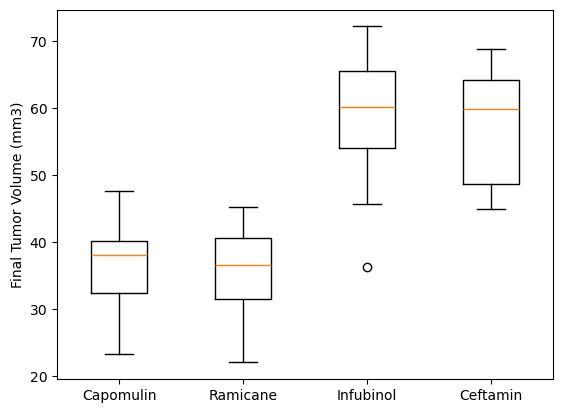

In [21]:
# Reference: https://stackoverflow.com/questions/52273543/creating-multiple-boxplots-on-the-same-graph-from-a-dictionary
# Generate a box plot that shows the distribution of the tumor volume for each treatment group

final_tumor_volumes = {'Capomulin': [38.982878, 38.939633, 30.485985, 37.074024, 40.159220, 47.685963, 37.311846, 38.125164, 38.753265, 
                                     41.483008, 38.846876, 28.430964, 33.329098, 46.539206, 32.377357, 41.581521, 23.343598, 40.728578, 34.455298, 
                                     31.023923, 40.658124, 39.952347, 36.041047, 28.484033, 31.896238], 
                       'Ramicane': [38.4076183, 43.0475426, 38.81036633, 32.97852192, 38.34200823, 33.39765251, 37.31123552,
                                    40.65900627, 29.12847181, 33.56240217, 36.37451039, 31.56046955, 36.13485243, 22.05012627,
                                    30.56462509, 31.09533505, 45.22086888, 36.56165229, 37.22565033, 43.41938077, 30.27623175,
                                    40.66771292, 43.16637266, 44.18345092, 30.63869575],
                      'Infubinol': [67.973419, 65.525743, 57.031862, 66.083066, 72.226731, 36.321346, 60.969711, 62.435404, 
                                    60.918767, 67.289621, 66.196912, 62.117279, 47.010364, 60.165180, 55.629428, 45.699331, 
                                    54.656549, 55.650681, 46.250112, 54.048608, 51.542431, 50.005138, 58.268442, 67.685569, 62.754451],
                       'Ceftamin': [ 62.99935619, 45.0, 56.05774909, 55.74282869, 48.72207785, 47.7846818, 61.84902336, 68.92318457,
                                     67.74866174, 57.91838132, 46.78453491, 59.85195552, 64.29983003, 59.74190064, 61.43389223, 64.19234114,
                                     45.0, 52.92534846, 45.0, 67.52748237, 45.0, 64.63494887, 61.38666032, 68.59474498, 64.72983655]}


fig, ax = plt.subplots()
ax.boxplot(final_tumor_volumes.values())
ax.set_xticklabels(final_tumor_volumes.keys())
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

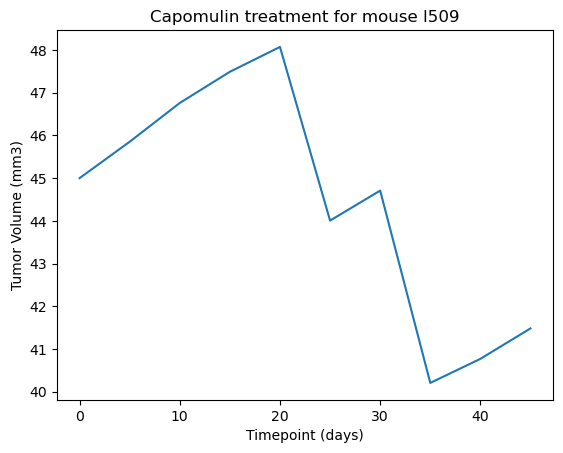

In [75]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
clean_l509_df = clean_df.loc[clean_df['Mouse ID'] == 'l509']
clean_l509_df

x_axis = clean_l509_df['Timepoint']
y_axis = clean_l509_df['Tumor Volume (mm3)']


plt.plot(x_axis, y_axis)
plt.title("Capomulin treatment for mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



In [76]:
clean_l509_df


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
231      l509          0           45.000000                 0    Capomulin   
253      l509          5           45.851193                 0    Capomulin   
539      l509         10           46.759074                 0    Capomulin   
881      l509         15           47.488599                 1    Capomulin   
982      l509         20           48.070452                 2    Capomulin   
1146     l509         25           44.006257                 2    Capomulin   
1414     l509         30           44.708055                 2    Capomulin   
1499     l509         35           40.207288                 2    Capomulin   
1723     l509         40           40.770813                 2    Capomulin   
1771     l509         45           41.483008                 3    Capomulin   

       Sex  Age_months  Weight (g)  
231   Male          17          21  
253   Male          17          21  
539   Male          17          21  
881   Male          17          21  
982   Male          17          21  
1146  Male          17          21  
1414  Male          17          21  
1499  Male          17          21  
1723  Male          17          21  
1771  Male          17          21

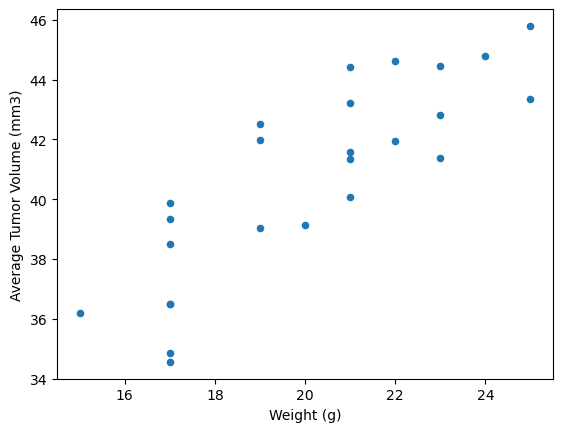

In [77]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Get only Capomulin records
clean_Capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# Get only required columns of data
clean_Capomulin_df = clean_Capomulin_df[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]

# Group by Mouse ID
# Reference: https://stackoverflow.com/questions/47647464/groupby-in-pandas-python
Capomulin_mouse_groupby_object = clean_Capomulin_df.groupby('Mouse ID')

# Reference: https://www.geeksforgeeks.org/pandas-concat-function-in-python/
# Calculate the average Tumor Volume per mouse ID, while converting the groupby object to a series
average_tumor_size_series = Capomulin_mouse_groupby_object['Tumor Volume (mm3)'].mean()

# Get weight per mouse ID (data only has 1 weight per mouse id, so this will equal the mean)
weight_series = Capomulin_mouse_groupby_object['Weight (g)'].mean()

# Concatenate the average_tumor_size series and the weight series, to form a DataFrame with mouse id as the index
Capomulin_mouse_concat_df = pd.concat([average_tumor_size_series, weight_series],axis = 1) 
Capomulin_mouse_concat_df

# Rename columns to show 'Tumor Volume (mm3)' as ' Average Tumor Volume (mm3)'
Capomulin_mouse_concat_df = Capomulin_mouse_concat_df.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume (mm3)'})
# Plot to scatter plot with required data
Capomulin_mouse_concat_df.plot(kind = "scatter", x = 'Weight (g)', y = 'Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [78]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = Capomulin_mouse_concat_df.iloc[:,0]
average_tumor_volume = Capomulin_mouse_concat_df.iloc[:,1]
correlation = st.pearsonr(weight, average_tumor_volume)   # On its own will provide the PearsonRResult and the pvalue
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


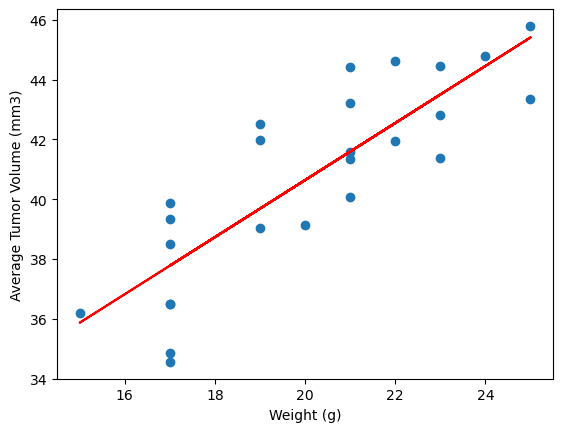

In [79]:
x_values = Capomulin_mouse_concat_df['Weight (g)']
y_values = Capomulin_mouse_concat_df['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" +str(round(slope,2)) + "x =" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()